# Linear Regression
###     (preliminary: Linear Model)
## 1. Library and Data, Preprocessing
## 2. Compute W and b with 3 methods 
    2-1. numpy
    2-2. sklearn - LinearRegression
    2-3. pytorch - Gradiend Descent

## 3. [Advanced] Regularization: Ridge, Lasso

# Library

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

import torch
import torch.nn as nn # for neural network models
import torch.optim as optim # for optimization 
import torch.nn.init as init # for initialization 

In [2]:
# reproducible PyTorch를 위한 randomness 제어하기

import random

random_seed = 41

torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

# https://hoya012.github.io/blog/reproducible_pytorch/

# simple data

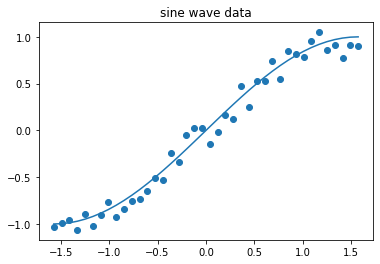

In [3]:
plt.figure()

# true data
N = 40
X = np.linspace(-np.pi/2, np.pi/2, N).reshape(N, 1) # 40 x 1
# (40, ) 와 (40, 1)은 다른 차원. 벡터, 2차원 행렬
y = np.sin(X)
plt.plot(X, y)

# add noise
y += 0.1*np.random.randn(N, 1)

plt.scatter(X, y)
plt.title('sine wave data')
plt.show()

# Make feature

In [7]:
n_feature = 1

PHI = np.ones(X.shape) # for bias
for i in range(1, n_feature+1):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1)
print('PHI.shape: ', PHI.shape) # 40 x 2
print('PHI[:3] \n', PHI[:3])

# shuffle

### Put your script here ###
idx = np.random.permutation(N)
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

PHI.shape:  (40, 2)
PHI[:3] 
 [[ 1.         -1.57079633]
 [ 1.         -1.49024267]
 [ 1.         -1.40968901]]


# Split train / test dataset

In [10]:
n = N-20

# train data

### Put your script here ###
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

print(PHI_train)
print(PHI_train.shape)

# test data

### Put your script here ###
X_test = shuffle_X[n:]
PHI_test = shuffle_PHI[n:]
y_test =  shuffle_y[n:]

print(PHI_test)
print(PHI_test.shape)

[[ 1.         -1.32913535]
 [ 1.         -0.04027683]
 [ 1.          0.68470609]
 [ 1.          1.32913535]
 [ 1.         -1.08747438]
 [ 1.         -0.84581341]
 [ 1.          0.2819378 ]
 [ 1.          1.57079633]
 [ 1.          1.40968901]
 [ 1.          0.04027683]
 [ 1.          0.92636706]
 [ 1.         -0.60415243]
 [ 1.         -0.44304512]
 [ 1.          1.16802804]
 [ 1.         -1.49024267]
 [ 1.         -1.2485817 ]
 [ 1.         -1.57079633]
 [ 1.          1.00692072]
 [ 1.          0.60415243]
 [ 1.          0.20138414]]
(20, 2)
[[ 1.          0.44304512]
 [ 1.          0.12083049]
 [ 1.          0.36249146]
 [ 1.         -0.92636706]
 [ 1.          1.2485817 ]
 [ 1.         -1.40968901]
 [ 1.          1.49024267]
 [ 1.         -0.20138414]
 [ 1.         -0.36249146]
 [ 1.         -0.2819378 ]
 [ 1.         -0.12083049]
 [ 1.          1.08747438]
 [ 1.         -0.52359878]
 [ 1.         -0.76525975]
 [ 1.         -1.16802804]
 [ 1.          0.84581341]
 [ 1.          0.76

In [6]:
# plot

### Put your script here ###

# Linear Regression (Normal Equation)
## method 1: compute W and b with numpy

![normal equation](https://yganalyst.github.io/assets/images/ML/chap3/normal_equation.jpg)

In [11]:
# compute W_ with PHI_train.


### Put your script here ###
# n_feature를 1늘리면 (3,1)
W_ = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train


print('[b, W] = W_')
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

[b, W] = W_
W_.shape:  (2, 1)
W_ 
 [[-0.0306178 ]
 [ 0.73416107]]


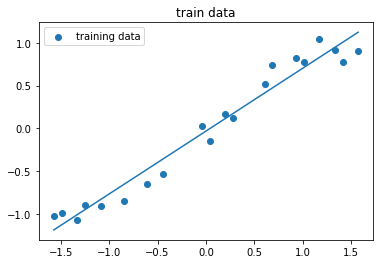

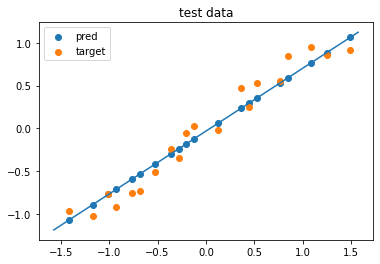

In [12]:
plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_train, y_train, label='training data')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_test, PHI_test @ W_, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Normal Equation)
## method 2: compute W and b with sklearn library

In [13]:
# make model and fit from sklearn

### Put your script here ###
reg = LinearRegression()
reg.fit(X_train, y_train)

print('b: ', reg.intercept_)
print('W: ', reg.coef_)

W_ = np.stack((reg.intercept_, reg.coef_[0]))

b:  [-0.0306178]
W:  [[0.73416107]]


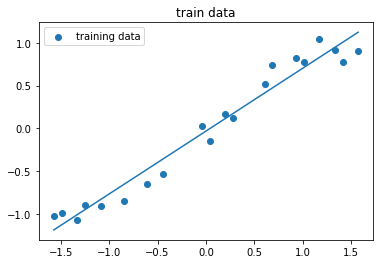

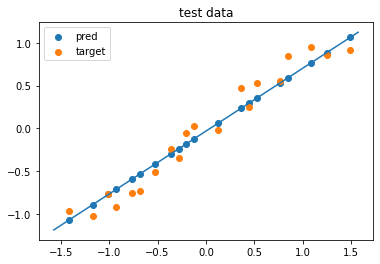

In [14]:
plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_train, y_train, label='training data')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_test, reg.predict(X_test), label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Linear Regression (Gradient Descent)
## method 3: compute W and b with pytorch library

In [11]:
# prepare data

### Put your script here ###
PHI_train = torch.tensor(PHI_train, dtype = torch.float) # if PHI_train is numpy.array
label = torch.tensor(y_train, dtype=torch.float)
PHI_test = torch.tensor(PHI_test, dtype = torch.float)

# prepare model
model = nn.Linear(n_feature+1, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare optimziation and loss function 
loss_function = nn.MSELoss() # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr = 0.1) # Stochastic Gradient Descent

# train the model 
for i in range(100):
    optimizer.zero_grad()
    output = model(PHI_train)
    
    loss = loss_function(output, label)
    
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


print('b: ', param_list[0][0][0].data)
print('W:', param_list[0][0][1].data)
W_ = param_list[0][0].detach().numpy()

# test the model
y_test_pred = model(PHI_test)
y_test_pred = y_test_pred.detach().numpy()

tensor(1.4735)
tensor(0.0355)
tensor(0.0230)
tensor(0.0229)
tensor(0.0229)
tensor(0.0229)
tensor(0.0229)
tensor(0.0229)
tensor(0.0229)
tensor(0.0229)
b:  tensor(-0.0306)
W: tensor(0.7342)


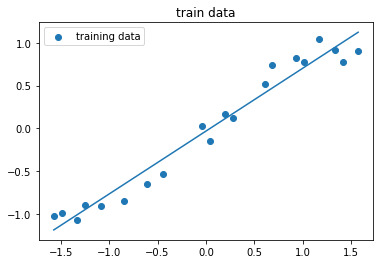

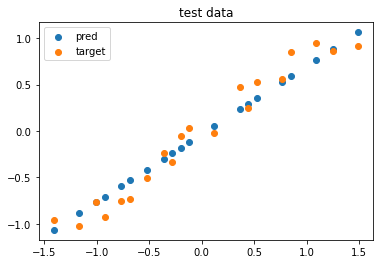

In [12]:
plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_train, y_train, label='training data')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# Advacned: Regularization (Ridge, Lasso)

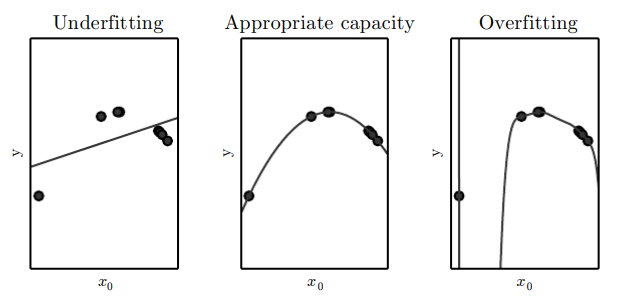

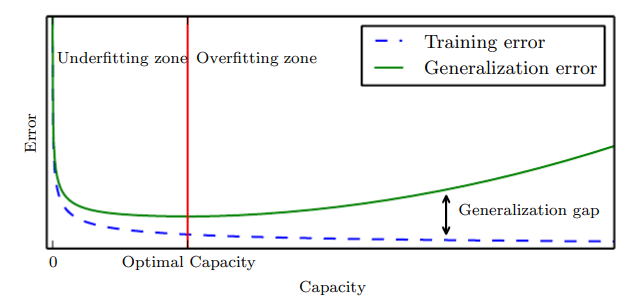

PHI.shape:  (40, 10)
PHI[:3] 
 [[  1.          -1.57079633   2.4674011   -3.87578459   6.08806819
   -9.56311515  15.02170615 -23.59604084  37.06457428 -58.22089714]
 [  1.          -1.49024267   2.22082321  -3.30956551   4.93205574
   -7.34995991  10.95322388 -16.32296158  24.32517384 -36.25041198]
 [  1.          -1.40968901   1.98722311  -2.80136658   3.94905568
   -5.5669404    7.84765471 -11.06275261  15.59504078 -21.98415762]]
W_.shape:  (10, 1)
W_ 
 [[-0.03201362]
 [ 1.12698803]
 [-0.09042332]
 [-0.85930314]
 [ 0.06795412]
 [ 1.73516205]
 [ 0.12190417]
 [-1.33323166]
 [-0.07054401]
 [ 0.30836355]]


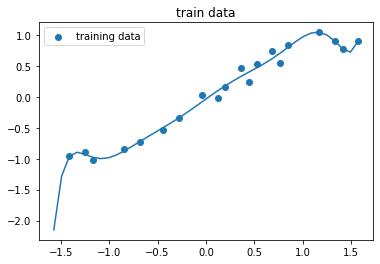

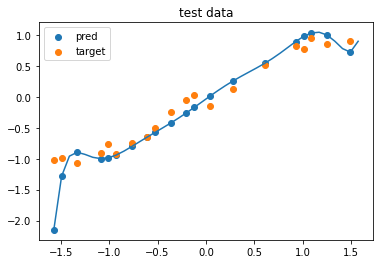

In [13]:
# include polynomials, rather than just linear! 
# -> increase the model's capacity

# 1-degree -> 9-degree (normal equation)
n_feature = 9

PHI = np.ones(X.shape[0]).reshape(-1, 1) # 40 x 1
for i in range(1, n_feature+1):
    PHI = np.concatenate((PHI, np.power(X, i)), axis=1)
print('PHI.shape: ', PHI.shape) # 40 x 10
print('PHI[:3] \n', PHI[:3])

# shuffle
idx = np.random.permutation(N)
shuffle_X = X[idx]
shuffle_PHI = PHI[idx]
shuffle_y = y[idx]

n = N-20

# train data
X_train = shuffle_X[:n]
PHI_train = shuffle_PHI[:n]
y_train = shuffle_y[:n]

# test data
X_test = shuffle_X[n:]
PHI_test = shuffle_PHI[n:]
y_test = shuffle_y[n:]

# compute W_ with PHI_train.
W_ = np.linalg.inv(PHI_train.T @ PHI_train) @ PHI_train.T @ y_train
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_train, y_train, label='training data')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_test, PHI_test @ W_, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

In [14]:
# prepare data
PHI_train = torch.tensor(PHI_train, dtype = torch.float) # if PHI_train is numpy.array
label = torch.tensor(y_train, dtype=torch.float)
PHI_test = torch.tensor(PHI_test, dtype = torch.float)

tensor(11.3471)
tensor(0.2315)
tensor(0.1932)
tensor(0.1701)
tensor(0.1546)
tensor(0.1431)
tensor(0.1339)
tensor(0.1262)
tensor(0.1194)
tensor(0.1133)
W_.shape:  (10, 1)
W_ 
 [[ 0.14788492]
 [ 0.10496556]
 [-0.13720138]
 [ 0.32064864]
 [-0.24085504]
 [ 0.20567805]
 [ 0.16030799]
 [ 0.03278474]
 [-0.00427503]
 [-0.0688856 ]]


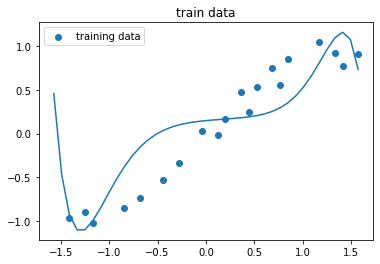

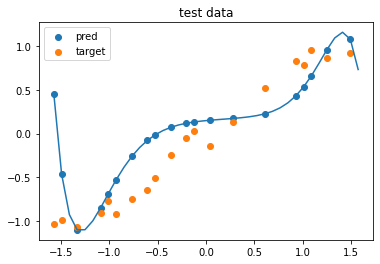

In [15]:
# 1-degree -> 9-degree (gradient descent)

# prepare data
PHI_train = PHI_train.clone().detach() # if PHI_train is torch.tensor
label = label.clone().detach()
PHI_test = PHI_test.clone().detach()

# prepare model 
model = ### Put your script here ###

# prepare loss function
loss_function = ### Put your script here ###
optimizer = ### Put your script here ###

# train the model
for i in range(1000):
    ### Put your script here ###


    
W_9 = ### Put your script here ###
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

# test the model
y_test_pred_9 = ### Put your script here ###
y_test_pred_9 = ### Put your script here ###

plt.figure()
plt.plot(X, PHI @ W_9)
plt.scatter(X_train, y_train, label='training data')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.plot(X, PHI @ W_9)
plt.scatter(X_test, y_test_pred_9, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

![Norm](https://pbs.twimg.com/media/DpoR4VnUUAEYglE.jpg)

# L2-Norm (Ridge, weight decay)

![weight decay](https://t1.daumcdn.net/cfile/tistory/993E7F3C5B83528E27)

tensor(4.5612)
tensor(0.1992)
tensor(0.1595)
tensor(0.1359)
tensor(0.1213)
tensor(0.1118)
tensor(0.1055)
tensor(0.1011)
tensor(0.0980)
tensor(0.0958)
W_.shape:  (10, 1)
W_ 
 [[ 0.05454794]
 [ 0.2125262 ]
 [-0.08612799]
 [ 0.23576309]
 [ 0.09451093]
 [ 0.08510187]
 [-0.0317742 ]
 [-0.0139007 ]
 [-0.00374633]
 [-0.01174056]]


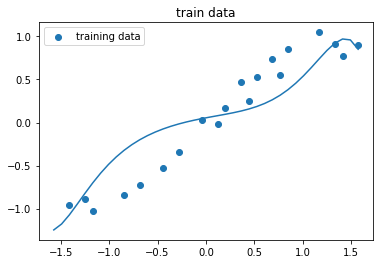

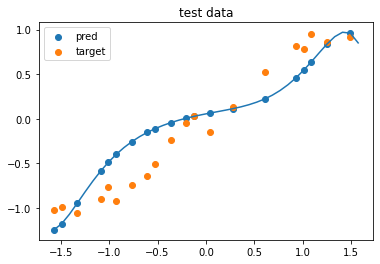

In [16]:
# prepare data
PHI_train = PHI_train.clone().detach() # if PHI_train is torch.tensor
label = label.clone().detach()
PHI_test = PHI_test.clone().detach()

# prepare model 
model = nn.Linear(n_feature+1, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare loss function
loss_function = nn.MSELoss()

# L2 reguliarzation
optimizer = optim.SGD(model.parameters(), lr = 0.001, weight_decay = 1)

# ref: https://deepapple.tistory.com/6

# train the model
for i in range(1000):
    
    ### Put your script here ### 
    
    if i % 100 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


W_ = param_list[0][0].detach().numpy().reshape(10, 1)
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

y_test_pred = model(PHI_test)
y_test_pred = y_test_pred.detach().numpy()

plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_train, y_train, label='training data')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()

# L1-Norm(Lasso)

tensor(6.8318)
tensor(0.1344)
tensor(0.1057)
tensor(0.0902)
tensor(0.0810)
tensor(0.0751)
tensor(0.0708)
tensor(0.0676)
tensor(0.0649)
tensor(0.0629)
W_.shape:  (10, 1)
W_ 
 [[ 3.39788894e-05]
 [ 4.05378371e-01]
 [ 8.24818239e-02]
 [ 5.28539233e-02]
 [-4.47976775e-02]
 [ 1.78290531e-01]
 [-6.90595433e-02]
 [-1.10010435e-04]
 [ 3.45251560e-02]
 [-3.23137864e-02]]


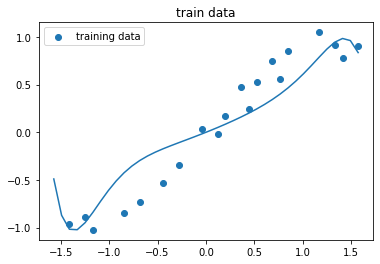

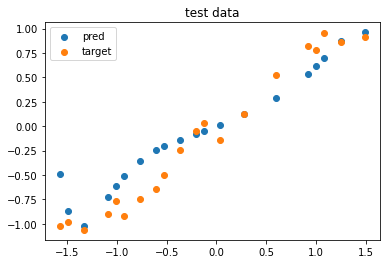

In [17]:
# prepare model
model = nn.Linear(n_feature+1, 1, bias = False) # train without bias. (PHI_train term have 1, have bias already.)

# prepare optimziation and loss function 
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
lambda_L1 = 0.1

#train model
for i in range(1000):
    optimizer.zero_grad()
    output = model(PHI_train)
    
    loss = loss_function(output, label)
    
    # L1 regularization
    norm_L1 = 0
    for param in model.parameters():
        norm_L1 += ### Put your script here ### 
        # hint: torch.sum(), torch.abs()
    
    loss += ### Put your script here ### 
    
    loss.backward()
    optimizer.step()
    
    if i % 100 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())


W_ = param_list[0][0].detach().numpy().reshape(10, 1)
print('W_.shape: ', W_.shape)
print('W_ \n', W_)

y_test_pred = model(PHI_test)
y_test_pred = y_test_pred.detach().numpy()

plt.figure()
plt.plot(X, PHI @ W_)
plt.scatter(X_train, y_train, label='training data')
plt.legend()
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_test, y_test_pred, label='pred')
plt.scatter(X_test, y_test, label='target')
plt.legend()
plt.title('test data')
plt.show()